# Disulfide Binary Class Breakdown

|   class_id | SS_Classname   | FXN        |   count |   incidence |   percentage |
|-----------:|:---------------|:-----------|--------:|------------:|-------------:|
|      00000 | -LHSpiral      | UNK        |   40943 |  0.23359    |    23.359    |
|      00002 | 00002          | UNK        |    9391 |  0.0535781  |     5.35781  |
|      00020 | -LHHook        | UNK        |    4844 |  0.0276363  |     2.76363  |
|      00022 | 00022          | UNK        |    2426 |  0.0138409  |     1.38409  |
|      00200 | -RHStaple      | Allosteric |   16146 |  0.092117   |     9.2117   |
|      00202 | 00202          | UNK        |    1396 |  0.00796454 |     0.796454 |
|      00220 | 00220          | UNK        |    7238 |  0.0412946  |     4.12946  |
|      00222 | 00222          | UNK        |    6658 |  0.0379856  |     3.79856  |
|      02000 | 02000          | UNK        |    7104 |  0.0405301  |     4.05301  |
|      02002 | 02002          | UNK        |    8044 |  0.0458931  |     4.58931  |
|      02020 | -LHStaple      | UNK        |    3154 |  0.0179944  |     1.79944  |
|      02022 | 02022          | UNK        |    1146 |  0.00653822 |     0.653822 |
|      02200 | -RHHook        | UNK        |    7115 |  0.0405929  |     4.05929  |
|      02202 | 02202          | UNK        |    1021 |  0.00582507 |     0.582507 |
|      02220 | -RHSpiral      | UNK        |    8989 |  0.0512845  |     5.12845  |
|      02222 | 02222          | UNK        |    7641 |  0.0435939  |     4.35939  |
|      20000 | ±LHSpiral      | UNK        |    5007 |  0.0285662  |     2.85662  |
|      20002 | +LHSpiral      | UNK        |    1611 |  0.00919117 |     0.919117 |
|      20020 | ±LHHook        | UNK        |    1258 |  0.00717721 |     0.717721 |
|      20022 | +LHHook        | UNK        |     823 |  0.00469542 |     0.469542 |
|      20200 | ±RHStaple      | UNK        |     745 |  0.00425042 |     0.425042 |
|      20202 | +RHStaple      | UNK        |     538 |  0.00306943 |     0.306943 |
|      20220 | ±RHHook        | Catalytic  |    1907 |  0.0108799  |     1.08799  |
|      20222 | 20222          | UNK        |    1159 |  0.00661239 |     0.661239 |
|      22000 | -/+LHHook      | UNK        |    3652 |  0.0208356  |     2.08356  |
|      22002 | 22002          | UNK        |    2052 |  0.0117072  |     1.17072  |
|      22020 | ±LHStaple      | UNK        |    1791 |  0.0102181  |     1.02181  |
|      22022 | +LHStaple      | UNK        |     579 |  0.00330334 |     0.330334 |
|      22200 | -/+RHHook      | UNK        |    8169 |  0.0466062  |     4.66062  |
|      22202 | +RHHook        | UNK        |     895 |  0.0051062  |     0.51062  |
|      22220 | ±RHSpiral      | UNK        |    3581 |  0.0204305  |     2.04305  |
|      22222 | +RHSpiral      | UNK        |    8254 |  0.0470912  |     4.70912  |


In [1]:
# DisulfideBond Class Analysis Dictionary creation
# Author: Eric G. Suchanek, PhD.
# (c) 2024 Eric G. Suchanek, PhD., All Rights Reserved
# License: BSD
# Last Modification: 2/20/24 -egs-

import pyvista as pv
from pyvista import set_plot_theme

import proteusPy as pp

# pyvista setup for notebooks
pv.set_jupyter_backend("trame")


THEME = "light"

INFO:proteusPy:ProteusPy 0.98.4.dev2 initialized 


In [2]:
PDB_SS = pp.Load_PDB_SS(verbose=True, subset=False)
pp.print_memory_used()

proteusPy: INFO 2025-01-16 15:09:15,097 - proteusPy.DisulfideLoader.Load_PDB_SS - Reading disulfides from: /Users/egs/miniforge3/envs/ppydev/lib/python3.12/site-packages/proteusPy/data/PDB_SS_ALL_LOADER.pkl...
INFO:proteusPy.DisulfideLoader:Reading disulfides from: /Users/egs/miniforge3/envs/ppydev/lib/python3.12/site-packages/proteusPy/data/PDB_SS_ALL_LOADER.pkl...
proteusPy: INFO 2025-01-16 15:09:20,560 - proteusPy.DisulfideLoader.Load_PDB_SS - Done reading disulfides from: /Users/egs/miniforge3/envs/ppydev/lib/python3.12/site-packages/proteusPy/data/PDB_SS_ALL_LOADER.pkl...
INFO:proteusPy.DisulfideLoader:Done reading disulfides from: /Users/egs/miniforge3/envs/ppydev/lib/python3.12/site-packages/proteusPy/data/PDB_SS_ALL_LOADER.pkl...


    =========== RCSB Disulfide Database Summary ============
       =========== Built: 2025-01-15 17:38:02 ===========
PDB IDs present:                 35361
Disulfides loaded:               158935
Average structure resolution:    2.18 Å
Lowest Energy Disulfide:         2q7q_75D_140D
Highest Energy Disulfide:        6vxk_801B_806B
Cα distance cutoff:              6.71 Å
Sγ distance cutoff:              2.12 Å
      ============== proteusPy: 0.98.4.dev0 ===================
proteusPy 0.98.4.dev2: Memory Used: 0.00 GB


In [ ]:
# plot the sextant class incidence as a function of binary class input. Generates 32 graphs

PDB_SS.plot_binary_to_eightclass_incidence(
    theme="light", save=False, savedir="/Users/egs/Documents/proteusPy"
)

Cutoff:   0.0 accounts for  100.00% and is  8514 members long.
Cutoff: 0.0102 accounts for   85.60% and is   958 members long.
Cutoff: 0.0204 accounts for   79.90% and is   561 members long.
Cutoff: 0.0306 accounts for   76.08% and is   407 members long.
Cutoff: 0.0408 accounts for   73.10% and is   322 members long.
Cutoff: 0.051 accounts for   70.21% and is   259 members long.
Cutoff: 0.0612 accounts for   68.01% and is   220 members long.
Cutoff: 0.0714 accounts for   66.10% and is   191 members long.
Cutoff: 0.0816 accounts for   63.95% and is   163 members long.
Cutoff: 0.0918 accounts for   62.66% and is   148 members long.
Cutoff: 0.102 accounts for   61.42% and is   135 members long.
Cutoff: 0.112 accounts for   60.78% and is   129 members long.
Cutoff: 0.122 accounts for   59.96% and is   122 members long.
Cutoff: 0.133 accounts for   59.31% and is   117 members long.
Cutoff: 0.143 accounts for   58.07% and is   108 members long.
Cutoff: 0.153 accounts for   56.90% and is   10

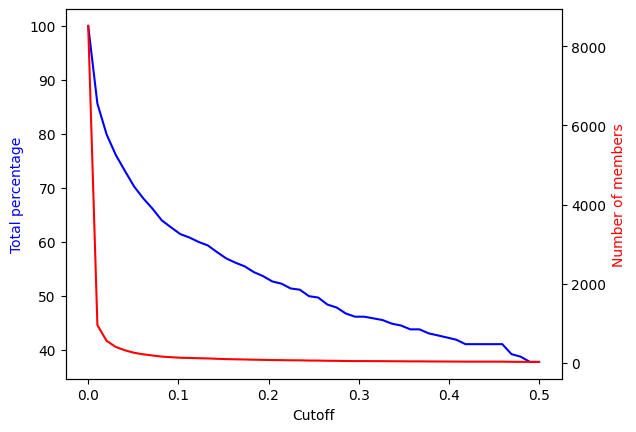

In [3]:
# the average structures for each class, returned as a
# list of disulfides
PDB_SS.plot_classes_vs_cutoff(0.5, 50)

In [ ]:
PDB_SS.tclass.eightclass_df

In [ ]:
PDB_SS.plot_count_vs_classid(base=8)

In [ ]:
PDB_SS.plot_classes_vs_cutoff(0.2, 50)

In [ ]:
PDB_SS.tclass.sslist_from_classid("+RHHook")

In [ ]:
# Remapping binary classes into six-space
# the tclass.binary_to_six_classes() function returns
# all possible combinations as a list of sextant-based
# strings. These variable names correspond to the names given by
# Hogg et al.

# most prevelent
LHSpiral_neg = PDB_SS.tclass.binary_to_six_class("00000")
RHSpiral_neg = PDB_SS.tclass.binary_to_six_class("02220")

LHSpiral_pminus = PDB_SS.tclass.binary_to_six_class("20000")
LHSpiral_plus = PDB_SS.tclass.binary_to_six_class("20002")

LHHook_neg = PDB_SS.tclass.binary_to_six_class("00020")
LHHook_pminus = PDB_SS.tclass.binary_to_six_class("20020")
LHHook_plus = PDB_SS.tclass.binary_to_six_class("20022")
LHHook_minus_plus = PDB_SS.tclass.binary_to_six_class("22000")

# Catalytic
RHHook_pminus = PDB_SS.tclass.binary_to_six_class("20220")

RHHook_minus = PDB_SS.tclass.binary_to_six_class("02200")

# Allosteric
RHStaple_neg = PDB_SS.tclass.binary_to_six_class("00200")

RHStaple_pminus = PDB_SS.tclass.binary_to_six_class("20200")
RHStaple_plus = PDB_SS.tclass.binary_to_six_class("20202")

LHStaple_neg = PDB_SS.tclass.binary_to_six_class("02020")
LHStaple_pminus = PDB_SS.tclass.binary_to_six_class("22020")
LHStaple_plus = PDB_SS.tclass.binary_to_six_class("22022")

RHSpiral_pminus = PDB_SS.tclass.binary_to_six_class("22220")
RHSpiral_plus = PDB_SS.tclass.binary_to_six_class("22222")

# Examining a Catalytic Disulfide Class
RHHook_pminus is considered to be 'catalytic', so we can
look more closely in six-space by examining the number of disulfides within
each of the possible six-space strings computed above:

For each six-class ID in the combo list, return the sslist represented by
that class and calculate the number of SS in it. 
Plot the results.

In [ ]:
df2 = enumerate_class_fromlist(RHStaple_neg, 8)
plot_count_vs_class_df(df2, "RHStaple_neg (Allosteric)", theme="light")

In [ ]:
df = enumerate_class_fromlist(LHSpiral_neg, 8)
plot_count_vs_class_df(df, title="LHSpiral_neg", theme="light")

In [ ]:
df4 = enumerate_class_fromlist(RHSpiral_plus, 8)
plot_count_vs_classid(df4, title="RHSpiral_plus", theme=THEME)

In [ ]:
from scipy.optimize import minimize
import numpy as np


def energy_function(x):
    chi1, chi2, chi3, chi4, chi5 = x
    energy = 2.0 * (np.cos(np.deg2rad(3.0 * chi1)) + np.cos(np.deg2rad(3.0 * chi5)))
    energy += np.cos(np.deg2rad(3.0 * chi2)) + np.cos(np.deg2rad(3.0 * chi4))
    energy += (
        3.5 * np.cos(np.deg2rad(2.0 * chi3))
        + 0.6 * np.cos(np.deg2rad(3.0 * chi3))
        + 10.1
    )
    return energy


initial_guess = [
    -60.0,
    -60.0,
    90.0,
    -60.0,
    -60.0,
]  # initial guess for chi1, chi2, chi3, chi4, chi5
result = minimize(energy_function, initial_guess, method="Nelder-Mead")
minimum_energy = result.fun
inputs = result.x
inputs[0]

In [ ]:
best_ss = Disulfide("BestDisulfide")
best_ss.build_model(inputs[0], inputs[1], inputs[2], inputs[3], inputs[4])
best_ss.pprint()

In [ ]:
def download_and_save_binary(url, filename):
    import requests

    response = requests.get(url)
    content = response.content
    open(filename, "wb+").write(content)


# download_and_save_binary("https://github.com/suchanek/proteusPy/blob/0adcd3185604f87b5f366232473a961fb67e6ac9/proteusPy/data/PDB_SS_ALL_LOADER.pkl", "SS.pkl")